# Penggunaan pandas untuk melakukan EDA

Pertama sekali dimulai dengan mengimpor data dari berkas CSV menggunakan pustaka pandas dan melihat waktu eksekusinya.

In [3]:
import pandas as pd
%time data = pd.read_csv("./train.csv", delimiter=',', index_col=0)

Wall time: 531 ms


Menampilkan beberapa sampel data dengan perintah berikut.

In [4]:
data.sample(5)

,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
patient_id,,,,,,,
79439,Plan B One-Step,Emergency Contraception,"""I was traveling on business with my colleague...",10,30-Apr-15,18,6.633970
133502,Tri-Sprintec,Abnormal Uterine Bleeding,"""I was 17 when I started on this pill because ...",10,4-Dec-09,26,6.653816
1441,Sumatriptan,Migraine,"""Injection WORKS in 7-10 minutes and you can h...",10,15-Mar-08,4,8.358951
48496,Ethinyl estradiol / levonorgestrel,Birth Control,"""I have been on Lutera (generic for Aviane) fo...",5,17-Aug-17,0,3.812866
93272,Vortioxetine,Depression,"""I have been taking this med for about a month...",10,4-Sep-15,88,6.110316


Menampilkan statistik deskriptif dengan perintah berikut.

In [5]:
data.describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000
mean,6.998912,27.893207,6.664261
std,3.274781,35.819035,1.588699
min,1.000000,0.000000,0.899076
25%,5.000000,6.000000,6.109307
50%,8.000000,16.000000,6.788245
75%,10.000000,36.000000,7.900790
max,10.000000,771.000000,8.992453


Kemudian memeriksa nilai yang hilang. Kami hanya akan mencetak 10 fitur secara berurut dengan lebih dari 10% nilai yang hilang.

In [6]:
total = data.isnull().sum().sort_values(ascending=False)

percent = (data.isnull().sum()/data.isnull().count()) \
.sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, \
                        keys=['Total', 'Missing Percent'])

missing_data['Missing Percent'] = \
missing_data['Missing Percent'].apply(lambda x: x*100)

missing_data.loc[missing_data['Missing Percent']>10][:10]

,Total,Missing Percent


Ditemukan bahwa pada dataset yang kami gunakan tidak terdapat missing value.

Selanjutnya digunakan pandas-profiling untuk dapat menampilkan informasi secara dinamis dan mudah.
Pandas-profiling menyatukan semua elemen-elemen yang tersedia untuk membentuk EDA yang lengkap: nilai yang paling sering muncul, nilai yang hilang, korelasi, statistik kuantitatif dan deskriptif, panjang data dan banyak lagi. Berkat metrik ini, Anda akan dengan cepat melihat distribusi dan disparitas data Anda. Informasi ini penting untuk mengetahui apakah data dapat diolah di proses yang selanjutnya atau tidak.

In [7]:
import pandas_profiling

data_fifa = pd.read_csv('./train.csv')
profile = data_fifa.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="drugs_pandas_profiling.html")

Berkas drugs_pandas_profiling.html menyajikan bagian “ikhtisar” dari laporan. Bagian ini secara
singkat menyajikan informasi tentang jenis variabel, nilai yang hilang, atau ukuran data set.

# Penggunaan Seaborn untuk melakukan EDA

Menyertakan beberapa pustaka pendukung seperti numpy dan matplotlib terlebih dahulu.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

impor pustaka seaborn

In [9]:
import seaborn as sns

Untuk melakukan EDA, mari menggunakan data set yang berisi informasi tentang kondisi dari pasien. Data set ini akan memuatnya ke dalam pandas DataFrame:

In [10]:
drugs = pd.read_csv('./train.csv')

In [11]:
drugs.shape

(32165, 8)

In [12]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32165 entries, 0 to 32164
Data columns (total 8 columns):
patient_id                    32165 non-null int64
name_of_drug                  32165 non-null object
use_case_for_drug             32165 non-null object
review_by_patient             32165 non-null object
effectiveness_rating          32165 non-null int64
drug_approved_by_UIC          32165 non-null object
number_of_times_prescribed    32165 non-null int64
base_score                    32165 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.0+ MB


Menganalisis Variabel Secara Individual

In [13]:
numerical_vars = ['effectiveness_rating', 'drug_approved_by_UIC', 'number_of_times_prescribed', 'base_score']
categorical_vars = ['name_of_drug', 'use_case_for_drug', 'review_by_patient']

In [14]:
drugs = drugs[numerical_vars+categorical_vars]

In [15]:
drugs.shape

(32165, 7)

Memahami Variabel Utama

In [16]:
drugs['use_case_for_drug'].describe()

count             32165
unique              636
top       Birth Control
freq               5795
Name: use_case_for_drug, dtype: object

Variabel Numerikal

In [20]:
drugs[numerical_vars].describe()

,effectiveness_rating,number_of_times_prescribed,base_score
count,32165.000000,32165.000000,32165.000000
mean,6.998912,27.893207,6.664261
std,3.274781,35.819035,1.588699
min,1.000000,0.000000,0.899076
25%,5.000000,6.000000,6.109307
50%,8.000000,16.000000,6.788245
75%,10.000000,36.000000,7.900790
max,10.000000,771.000000,8.992453


C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\User\Anaconda3\lib\site-packages\pandas\plotting\_ma

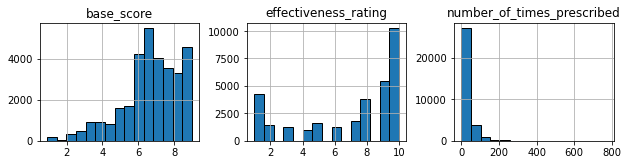

In [31]:
drugs[numerical_vars].hist(edgecolor='black', bins=15, figsize=(14, 5), layout = (2,4));

Variabel Kategorikal

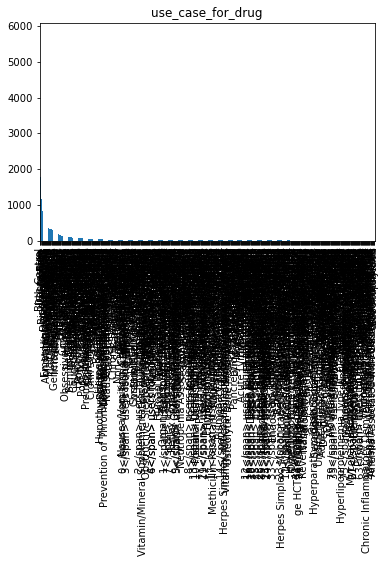

In [25]:
drugs['use_case_for_drug'].value_counts().plot(kind='bar', title='use_case_for_drug');